In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {star_wars.shape[0]:,}'
      f'\n\033[1mNumber of columns:\033[0m \t  {star_wars.shape[1]:,}'
      f'\n\033[1mNumber of missing values:\033[0m {star_wars.isnull().sum().sum()}'
      f'\n\n\033[1mCOLUMN NAMES:\033[0m \n{star_wars.columns.to_list()}')

Number of rows:		  1,186
Number of columns: 	  38
Number of missing values: 13454

COLUMN NAMES: 
['RespondentID', 'Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Which character shot first?', 'Are you familiar with the Expa

In [3]:
star_wars.iloc[:,1].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [4]:
star_wars.iloc[:,2].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [5]:
star_wars.iloc[:,1] = star_wars.iloc[:,1].map({'Yes':True,'No':False})
star_wars.iloc[:,1].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars.iloc[:,2] = star_wars.iloc[:,2].map({'Yes':True,'No':False})
star_wars.iloc[:,2].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
rename = {
"Star Wars: Episode VI Return of the Jedi": True,
"Star Wars: Episode V The Empire Strikes Back": True,
"Star Wars: Episode IV  A New Hope": True,
"Star Wars: Episode III  Revenge of the Sith": True,
"Star Wars: Episode II  Attack of the Clones": True,
"Star Wars: Episode I  The Phantom Menace": True,
np.nan : False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(rename)


In [8]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })



In [11]:
star_wars.columns.to_list()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'seen_1',
 'seen_2',
 'seen_3',
 'seen_4',
 'seen_5',
 'seen_6',
 'ranking_1',
 'ranking_2',
 'ranking_3',
 'ranking_4',
 'ranking_5',
 'ranking_6',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expanded Universe?',
 'Do you consider yourself to be a fan of the Star Trek franchise?',
 'Gender',
 'Age',
 'Household Income',
 'Education',
 'Location (Census Region)']

In [12]:
star_wars[star_wars.columns[9:15]].mean()


ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

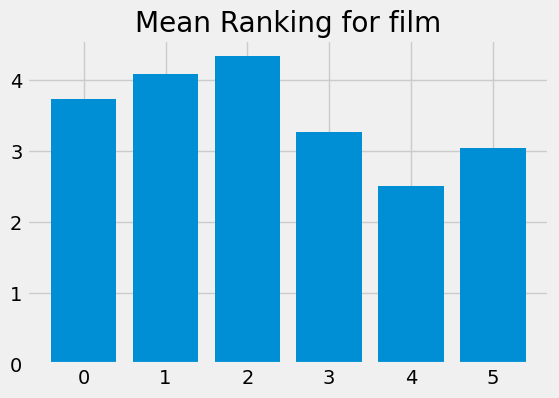

In [13]:
plt.bar(range(6),star_wars[star_wars.columns[9:15]].mean())
plt.title('Mean Ranking for film')
plt.show()

In [14]:
star_wars[star_wars.columns[3:9]].sum()


seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

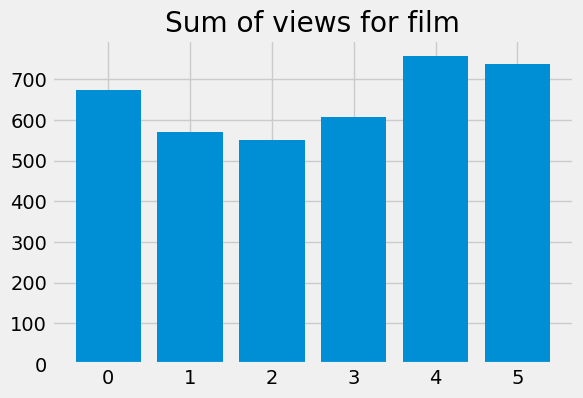

In [15]:
plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum())
plt.title('Sum of views for film')
plt.show()

# Gender split for reaserch

Total fans: 552
Number of female fans are 238 while there are 303 male fans.


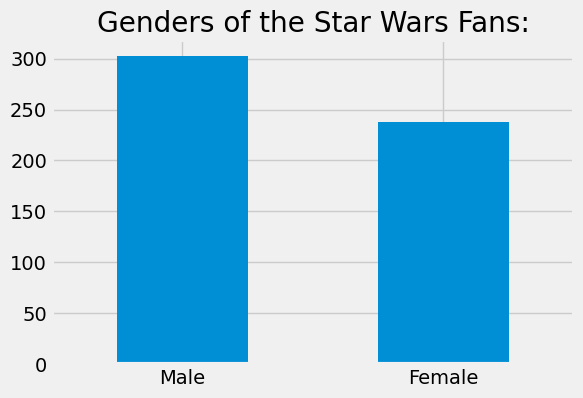

In [16]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]

female_fans = fans[fans["Gender"] == "Female"]
male_fans = fans[fans["Gender"] == "Male"]

print("Total fans: {}".format(fans.shape[0]))
print("Number of female fans are {f} while there are {m} male fans.".format(f=female_fans.shape[0], m=male_fans.shape[0]))

fans["Gender"].value_counts().plot.bar(title="Genders of the Star Wars Fans:", rot=0)
plt.show()

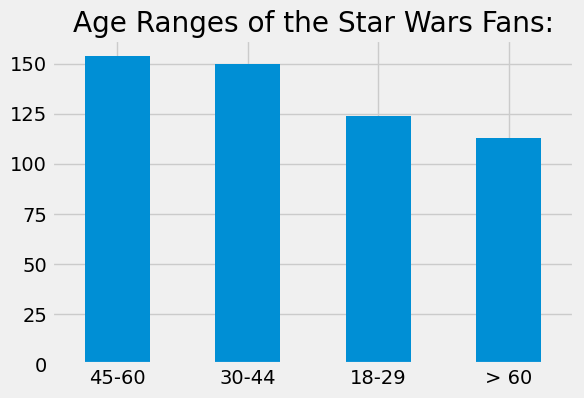

In [17]:
fans["Age"].value_counts().plot.bar(title="Age Ranges of the Star Wars Fans:", rot=0)
plt.show()

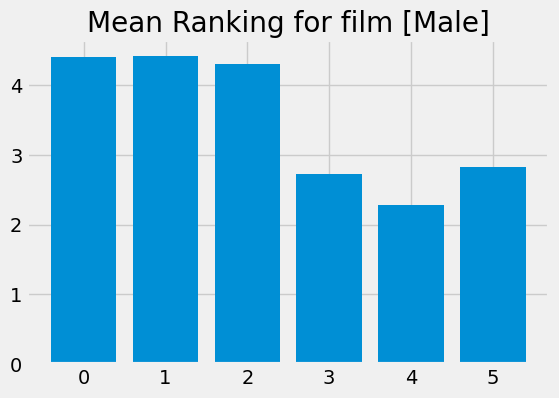

In [18]:
plt.bar(range(6),male_fans[male_fans.columns[9:15]].mean())
plt.title('Mean Ranking for film [Male]')
plt.show()

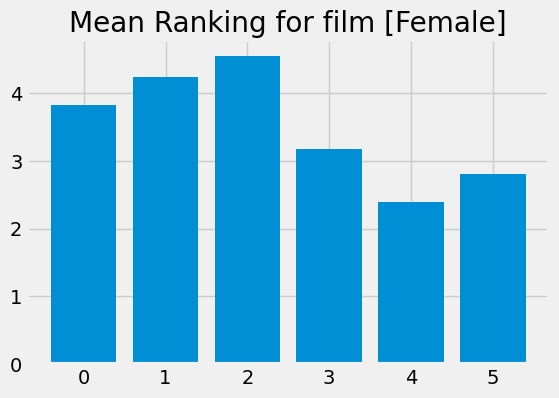

In [19]:
plt.bar(range(6),female_fans[female_fans.columns[9:15]].mean())
plt.title('Mean Ranking for film [Female]')
plt.show()

Good project - https://community.dataquest.io/tags/c/social/share/49/201?ascending=false&order=likes